# APPLYING REGULARIZATION TECHNIQUES TO COVID-19 DATASET

## INDEX
#### 1. SUMMARY OF THE DATASET
#### 2. DATA EXPLORATION AND CLEANING
#### 3. LOGISTIC REGRESSION REGULARIZATION


## 1. SUMMARY OF THE DATASET

In this notebook, The dataset contains results of a survey about emotional responses to COVID-19.
2491 participants were asked to indicate their emotions and express these in numerical scores.
In this analysis, chosen_emotion target variable effected by the given independent variables explored.

## 2. DATA EXPLORATION AND CLEANING

In [1]:
# Necessary modules imported.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import pandas as pd  
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# In the sheet 0 there is an explanation for dataset so sheet_name=1 used for extracting the data. 

dataset = pd.read_excel(r"C:\Users\ASUS\Desktop\Data Proje Çiğde\COVID-19 Data.xlsx", sheet_name = 1)
dataset.head(10)

,Subject_ID,startdate,enddate,duration,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,self_rating_general,twitter_general_often,twitter_tweet_often,twitter_participate_often,eng_native
0,1,2020-04-06 07:50:34,2020-04-06 07:55:33,298,4.0,Relaxation,3.0,4.0,3.0,4.0,2.0,3.0,6.0,6.0,4.0,7.0,5.0,7.0,Yes
1,2,2020-04-06 07:51:27,2020-04-06 07:55:49,262,6.0,Anxiety,1.0,1.0,5.0,8.0,6.0,3.0,1.0,1.0,6.0,9.0,5.0,2.0,Yes
2,3,2020-04-06 07:51:13,2020-04-06 07:55:59,285,5.0,Anxiety,6.0,5.0,8.0,7.0,6.0,2.0,2.0,2.0,6.0,7.0,3.0,3.0,Yes
3,4,2020-04-06 07:51:48,2020-04-06 07:56:47,299,4.0,Anxiety,2.0,1.0,3.0,4.0,1.0,4.0,5.0,2.0,6.0,9.0,6.0,7.0,Yes
4,5,2020-04-06 07:51:27,2020-04-06 07:56:55,328,9.0,Fear,5.0,6.0,9.0,8.0,8.0,2.0,1.0,1.0,9.0,9.0,1.0,2.0,Yes
5,6,2020-04-06 07:50:32,2020-04-06 07:57:11,399,9.0,Anxiety,8.0,8.0,9.0,9.0,6.0,5.0,3.0,3.0,8.0,9.0,2.0,2.0,Yes
6,7,2020-04-06 07:50:24,2020-04-06 07:57:27,423,7.0,Anxiety,4.0,2.0,6.0,8.0,6.0,5.0,7.0,4.0,7.0,9.0,8.0,6.0,Yes
7,8,2020-04-06 07:51:55,2020-04-06 07:57:33,338,7.0,Fear,2.0,2.0,7.0,6.0,1.0,6.0,2.0,1.0,9.0,9.0,1.0,1.0,Yes
8,9,2020-04-06 07:52:08,2020-04-06 07:57:51,343,3.0,Sadness,3.0,2.0,5.0,5.0,5.0,5.0,4.0,4.0,8.0,9.0,5.0,3.0,Yes
9,10,2020-04-06 07:51:41,2020-04-06 07:58:28,406,9.0,Anxiety,1.0,1.0,9.0,9.0,9.0,1.0,1.0,1.0,9.0,7.0,3.0,3.0,Yes


In [3]:
# Subject_ID, startdate and enddate has been dropped because they don't provide useful information.

dataset = dataset.drop(columns = ["Subject_ID","startdate","enddate"])

In [4]:
# Target variables' uniques entities explored.

dataset["chosen_emotion"].unique()

array(['Relaxation', 'Anxiety', 'Fear', 'Sadness', 'Desire', 'Anger',
       'Disgust', 'Happiness'], dtype=object)

In [5]:
# New classes created by assigning negative emotions to "0" and positive emotions to "1". 

def classes_def(x):
    if x ==  "Anxiety":
        return "0"
    elif x == "Fear":
        return "0"
    elif x == "Sadness":
        return "0"
    elif x ==  "Anger":
        return "0"
    elif x ==  "Disgust":
        return "0"
    else:
        return "1"
    

dataset['chosen_emotion']=dataset['chosen_emotion'].apply(lambda x:classes_def(x))


dataset.chosen_emotion.value_counts(normalize= True)


0    0.839823
1    0.160177
Name: chosen_emotion, dtype: float64

In [6]:
# Float values converted to integer values.

dataset['chosen_emotion'] = dataset['chosen_emotion'].astype(int)

In [7]:
# Checked whether the 'chosen_emotion' column corrected.

dataset.head()

,duration,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,self_rating_general,twitter_general_often,twitter_tweet_often,twitter_participate_often,eng_native
0,298,4.0,1,3.0,4.0,3.0,4.0,2.0,3.0,6.0,6.0,4.0,7.0,5.0,7.0,Yes
1,262,6.0,0,1.0,1.0,5.0,8.0,6.0,3.0,1.0,1.0,6.0,9.0,5.0,2.0,Yes
2,285,5.0,0,6.0,5.0,8.0,7.0,6.0,2.0,2.0,2.0,6.0,7.0,3.0,3.0,Yes
3,299,4.0,0,2.0,1.0,3.0,4.0,1.0,4.0,5.0,2.0,6.0,9.0,6.0,7.0,Yes
4,328,9.0,0,5.0,6.0,9.0,8.0,8.0,2.0,1.0,1.0,9.0,9.0,1.0,2.0,Yes


In [8]:
# Information of the dataset printed.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2491 entries, 0 to 2490
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   2491 non-null   int64  
 1   worry                      2487 non-null   float64
 2   chosen_emotion             2491 non-null   int32  
 3   anger                      2487 non-null   float64
 4   disgust                    2487 non-null   float64
 5   fear                       2487 non-null   float64
 6   anxiety                    2487 non-null   float64
 7   sadness                    2487 non-null   float64
 8   happiness                  2487 non-null   float64
 9   relaxation                 2487 non-null   float64
 10  desire                     2487 non-null   float64
 11  self_rating_general        2490 non-null   float64
 12  twitter_general_often      2490 non-null   float64
 13  twitter_tweet_often        2490 non-null   float

In [9]:
# Missing Values % contribution calculated. 

dataset_null = dataset.isna().mean().round(4) * 100

dataset_null.sort_values(ascending=False).head(15)

desire                       0.16
relaxation                   0.16
happiness                    0.16
sadness                      0.16
anxiety                      0.16
fear                         0.16
disgust                      0.16
anger                        0.16
worry                        0.16
twitter_participate_often    0.04
twitter_tweet_often          0.04
twitter_general_often        0.04
self_rating_general          0.04
eng_native                   0.00
chosen_emotion               0.00
dtype: float64

In [10]:
# Checked whether there are NaN values or empty cells.

print('** Null:')
print(dataset.isnull().any())
print('\n')
print('** NaN:')
print(dataset.isna().any())

** Null:
duration                     False
worry                         True
chosen_emotion               False
anger                         True
disgust                       True
fear                          True
anxiety                       True
sadness                       True
happiness                     True
relaxation                    True
desire                        True
self_rating_general           True
twitter_general_often         True
twitter_tweet_often           True
twitter_participate_often     True
eng_native                   False
dtype: bool


** NaN:
duration                     False
worry                         True
chosen_emotion               False
anger                         True
disgust                       True
fear                          True
anxiety                       True
sadness                       True
happiness                     True
relaxation                    True
desire                        True
self_rating_general     

As seen above, there are lots of NaN values. In order to deal with them, each of the variable's mean can be replaced instead.

In [11]:
# Filling NaN values with the variable means.

dataset['worry'].fillna((dataset['worry'].mean()), inplace=True)
dataset['anger'].fillna((dataset['anger'].mean()), inplace=True)
dataset['disgust'].fillna((dataset['disgust'].mean()), inplace=True)
dataset['fear'].fillna((dataset['fear'].mean()), inplace=True)
dataset['anxiety'].fillna((dataset['anxiety'].mean()), inplace=True)
dataset['sadness'].fillna((dataset['sadness'].mean()), inplace=True)
dataset['happiness'].fillna((dataset['happiness'].mean()), inplace=True)
dataset['relaxation'].fillna((dataset['relaxation'].mean()), inplace=True)
dataset['desire'].fillna((dataset['desire'].mean()), inplace=True)
dataset['self_rating_general'].fillna((dataset['self_rating_general'].mean()), inplace=True)
dataset['twitter_general_often'].fillna((dataset['twitter_general_often'].mean()), inplace=True)
dataset['twitter_tweet_often'].fillna((dataset['twitter_tweet_often'].mean()), inplace=True)
dataset['twitter_participate_often'].fillna((dataset['twitter_participate_often'].mean()), inplace=True)

In [12]:
# Checked whether variables have replaced or not.

dataset_null = dataset.isna().mean().round(4) * 100

dataset_null.sort_values(ascending=False).head(15)

eng_native                   0.0
twitter_participate_often    0.0
twitter_tweet_often          0.0
twitter_general_often        0.0
self_rating_general          0.0
desire                       0.0
relaxation                   0.0
happiness                    0.0
sadness                      0.0
anxiety                      0.0
fear                         0.0
disgust                      0.0
anger                        0.0
chosen_emotion               0.0
worry                        0.0
dtype: float64

In [13]:
# Basic statistics summarized.
dataset.describe()

,duration,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,self_rating_general,twitter_general_often,twitter_tweet_often,twitter_participate_often
count,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000
mean,589.710558,6.554483,0.160177,3.906313,3.228790,5.668275,6.484520,5.589063,3.624849,3.952553,2.974668,6.883534,6.257028,3.664257,3.414056
std,394.880211,1.761294,0.366843,2.234376,2.133574,2.272882,2.276222,2.310272,1.886007,2.124480,2.036948,1.686972,2.804722,2.520066,2.402317
min,176.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,380.500000,6.000000,0.000000,2.000000,1.000000,4.000000,5.000000,4.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,491.000000,7.000000,0.000000,3.906313,3.000000,6.000000,7.000000,6.000000,4.000000,4.000000,2.000000,7.000000,7.000000,3.000000,3.000000
75%,678.500000,8.000000,0.000000,6.000000,5.000000,7.000000,8.000000,7.000000,5.000000,5.000000,4.000000,8.000000,9.000000,6.000000,5.000000
max,9515.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
# Categorical and numerical variables categorized

num_var = dataset.drop(columns=['chosen_emotion']).select_dtypes([np.number]).columns
cat_var = dataset.drop(columns=['chosen_emotion']).select_dtypes(include=object ).columns

In [15]:
# Numerical Variables

num_var

Index(['duration', 'worry', 'anger', 'disgust', 'fear', 'anxiety', 'sadness',
       'happiness', 'relaxation', 'desire', 'self_rating_general',
       'twitter_general_often', 'twitter_tweet_often',
       'twitter_participate_often'],
      dtype='object')

In [16]:
# Categorical Variables

cat_var

Index(['eng_native'], dtype='object')

In [17]:
# Dummies created.

dataset_dummy=pd.get_dummies(dataset.copy(), dummy_na=False, drop_first=True)
dataset_dummy.head()

,duration,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,self_rating_general,twitter_general_often,twitter_tweet_often,twitter_participate_often,eng_native_No but I speak it fluently,eng_native_Yes
0,298,4.0,1,3.0,4.0,3.0,4.0,2.0,3.0,6.0,6.0,4.0,7.0,5.0,7.0,0,1
1,262,6.0,0,1.0,1.0,5.0,8.0,6.0,3.0,1.0,1.0,6.0,9.0,5.0,2.0,0,1
2,285,5.0,0,6.0,5.0,8.0,7.0,6.0,2.0,2.0,2.0,6.0,7.0,3.0,3.0,0,1
3,299,4.0,0,2.0,1.0,3.0,4.0,1.0,4.0,5.0,2.0,6.0,9.0,6.0,7.0,0,1
4,328,9.0,0,5.0,6.0,9.0,8.0,8.0,2.0,1.0,1.0,9.0,9.0,1.0,2.0,0,1


In [18]:
X = dataset_dummy.drop('chosen_emotion',axis=1)
y = dataset_dummy['chosen_emotion']
X_col=X.columns
X_col

Index(['duration', 'worry', 'anger', 'disgust', 'fear', 'anxiety', 'sadness',
       'happiness', 'relaxation', 'desire', 'self_rating_general',
       'twitter_general_often', 'twitter_tweet_often',
       'twitter_participate_often', 'eng_native_No but I speak it fluently',
       'eng_native_Yes'],
      dtype='object')

## 3. LOGISTIC REGRESSION REGULARIZATION

In [19]:
# X variables scaled.

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Dataset splitted into training set and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [21]:
# For regularization cost parameter setted to be 0.001. Also cross validation used for preventing overfitting.

logreg = LogisticRegression(C=0.001,penalty='l2',max_iter=1000)
logreg.fit(X_train, y_train)    
scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV

array([0.87      , 0.89      , 0.88442211, 0.88944724, 0.85929648,
       0.87437186, 0.81909548, 0.87939698, 0.88442211, 0.87939698])

In [22]:
# Mean of the cross validated accuracies are printed.

np.mean(scoreCV)

0.8729849246231156

In [23]:
# First iteration coefficient results printed.

Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                                Variables  Coefficients
0                               Intercept     -1.938949
1                                duration      0.015007
2                                   worry     -0.146999
3                                   anger     -0.108643
4                                 disgust     -0.069676
5                                    fear     -0.158002
6                                 anxiety     -0.231871
7                                 sadness     -0.164352
8                               happiness      0.149253
9                              relaxation      0.234220
10                                 desire      0.050100
11                    self_rating_general      0.013943
12                  twitter_general_often      0.004568
13                    twitter_tweet_often     -0.016271
14              twitter_participate_often     -0.019025
15  eng_native_No but I speak it fluently      0.008128
16                         eng_native_Yes     -0

In [24]:
# Rather than trying C values one by one, it can be done using for loop with range of C parameters.

C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l2',max_iter=1000)
    logreg.fit(X_train, y_train)    
    scoreCV = cross_val_score(logreg, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])


In [25]:
# Scores of the cost parameters printed.

df = pd.DataFrame(scoresCV,columns=['C (1/lambda)','Validation Accuracy'])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.872985
1,0.010,0.928216
2,0.100,0.937749
3,1.000,0.936746
4,10.000,0.937251
5,100.000,0.937251
6,1000.000,0.937251
7,10000.000,0.937251


In [26]:
df.sort_values(by=['C (1/lambda)'],ascending=False)

,C (1/lambda),Validation Accuracy
7,10000.000,0.937251
6,1000.000,0.937251
5,100.000,0.937251
4,10.000,0.937251
3,1.000,0.936746
2,0.100,0.937749
1,0.010,0.928216
0,0.001,0.872985


Text(0, 0.5, 'weights')

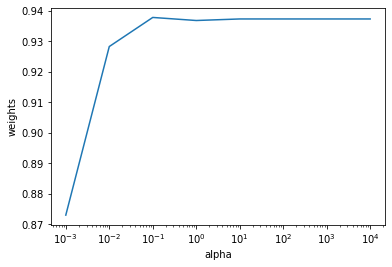

In [27]:
# AUC graph visualized.

ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [28]:
# Model fitted using training set and then test accuracy printed.

logreg = LogisticRegression(C=1,penalty='l2',max_iter=10,solver='liblinear')
logreg.fit(X_train, y_train)
score = logreg.score(X_test, y_test)
print(score)


0.9258517034068137


In [29]:
# Model Coefficients

Model_intercept = pd.DataFrame({"Variables":'Intercept',"Coefficients":logreg.intercept_[0]},index=[0])
Model_coefficients = pd.DataFrame({"Variables":X_col,"Coefficients":np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept,Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

                                Variables  Coefficients
0                               Intercept     -3.929717
1                                duration      0.087237
2                                   worry     -0.484855
3                                   anger     -0.302832
4                                 disgust     -0.043274
5                                    fear      0.394130
6                                 anxiety     -1.311718
7                                 sadness     -0.603733
8                               happiness      0.140154
9                              relaxation      1.846442
10                                 desire      0.033365
11                    self_rating_general      0.118750
12                  twitter_general_often      0.155940
13                    twitter_tweet_often     -0.105049
14              twitter_participate_often     -0.060024
15  eng_native_No but I speak it fluently      0.064274
16                         eng_native_Yes      0

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba
# treshold value is set to default value to compare the result
# treshold value is set to %20 value
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype(float)
y_pred


array([1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

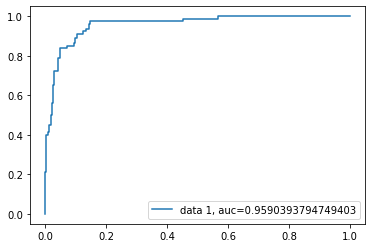

In [31]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

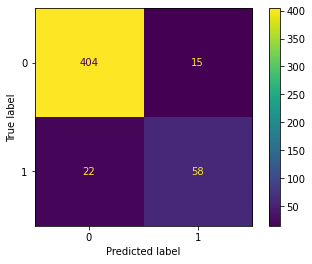

In [33]:
# Confusion matrix plotted.

plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()  

## DECISION TREE

In [34]:
from sklearn.tree import DecisionTreeClassifier


In [35]:
[round(x,2) for x in np.linspace(start = 0, stop = 0.1, num =5 )]

[0.0, 0.02, 0.05, 0.08, 0.1]

In [36]:
# Number of trees in decision tree.
max_depth = [int(x) for x in np.linspace(start = 3, stop = 10, num =8 )]

# Number of features to consider at every split.
ccp_alpha =  [round(x,2) for x in np.linspace(start = 0, stop = 0.1, num =5 )]


In [37]:
param_grid = {'max_depth': max_depth,
               'ccp_alpha': ccp_alpha}
print(param_grid)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'ccp_alpha': [0.0, 0.02, 0.05, 0.08, 0.1]}


In [38]:
dtc_Model = DecisionTreeClassifier()

In [39]:
#I CALLED GRID CV TO DEFINE MY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
dtc_Grid = GridSearchCV(estimator = dtc_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)

In [40]:
dtc_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.02, 0.05, 0.08, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [41]:
dtc_Grid.best_params_
#OUR BEST PARAMETERS WITHIN 900 FITS
dtc_Grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': 4}

In [42]:
print (f'Train Accuracy  : {dtc_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy  : {dtc_Grid.score(X_test,y_test):.3f}')
#BEST SCORE

Train Accuracy  : 0.949
Test Accuracy  : 0.924


In [43]:
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(ccp_alpha= dtc_Grid.best_params_["ccp_alpha"], max_depth= dtc_Grid.best_params_["max_depth"], random_state=0)


model.fit(X_train, y_train)
print(model)

y_train_predicted = model.predict(X_train)
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted))
y_test_predicted = model.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted))

print('\n\nRoot Mean Squared Error on train set:', RMSE_train)
print('Root Mean Squared Error on test set:', RMSE_test)
print('Mean of y_train:', float(y.mean()))

DecisionTreeClassifier(max_depth=4, random_state=0)


Root Mean Squared Error on train set: 0.2262848189276259
Root Mean Squared Error on test set: 0.2759570702287195
Mean of y_train: 0.1601766358892011


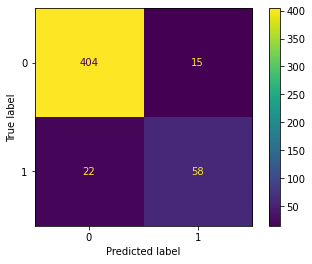

In [44]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()  

## RANDOM FOREST

In [45]:
# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt', "log2"]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 5, 10]

# Method of selecting samples for training each tree.
bootstrap = [True, False]

In [46]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 5, 10], 'bootstrap': [True, False]}


In [47]:
rf_Model = RandomForestClassifier()

In [48]:
#I CALLED GRID CV TO DEFINE MY HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)

In [49]:
#OUR BEST PARAMETERS WITHIN 900 FITS

In [50]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [51]:
rf_Grid.best_params_
#OUR BEST PARAMETERS WITHIN 900 FITS
rf_Grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 20}

In [52]:
print (f'Train Accuracy  : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy  : {rf_Grid.score(X_test,y_test):.3f}')
#BEST SCORE

Train Accuracy  : 0.959
Test Accuracy  : 0.930


In [53]:
# Model fitted using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= rf_Grid.best_params_["n_estimators"], max_features= 'log2',min_samples_leaf= rf_Grid.best_params_["min_samples_leaf"], random_state=0)


model.fit(X_train, y_train)
print(model)


RandomForestClassifier(max_features='log2', min_samples_leaf=5, n_estimators=20,
                       random_state=0)


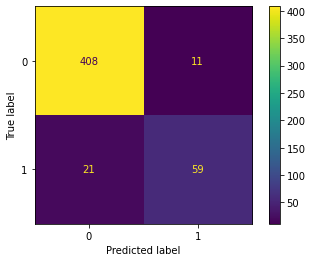

In [54]:
# Confusion matrix plotted.

plot_confusion_matrix(model, X_test, y_test)  
plt.show()  